In [5]:
import pandas as pd
from pycaret.classification import *

In [6]:
geo_select_gene = pd.read_csv("../test.txt", sep="\t")
geo_select_gene

In [7]:
geo_select_gene.drop(['sample_barcode'], axis = 1, inplace=True)

In [8]:
s = setup(geo_select_gene, target = 'sample_type', fix_imbalance=True, silent=True)

,Description,Value
0,session_id,1204
1,Target,sample_type
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(419, 21)"
5,Missing Values,False
6,Numeric Features,20
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


* Classification Model

```
xgboost, et, catboost, dt, lightgbm, rf
```

In [9]:
best = compare_models(include=['xgboost', 'et', 'catboost', 'lightgbm', 'rf'], sort = "MCC")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9660,0.9942,0.9774,0.9850,0.9809,0.8204,0.8277,0.1310
rf,Random Forest Classifier,0.9659,0.9949,0.9811,0.9812,0.9809,0.8155,0.8206,0.0200
catboost,CatBoost Classifier,0.9625,0.9949,0.9735,0.9850,0.9790,0.8042,0.8126,1.6800
xgboost,Extreme Gradient Boosting,0.9592,0.9926,0.9735,0.9816,0.9771,0.7874,0.8003,0.1460
lightgbm,Light Gradient Boosting Machine,0.9592,0.9910,0.9735,0.9816,0.9771,0.7874,0.8003,0.0850


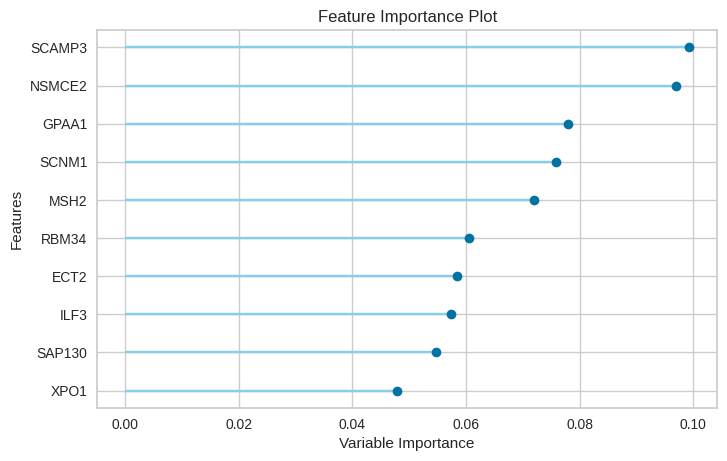

In [12]:
plot_model(best, plot = 'feature', use_train_data=True, save=False)

In [11]:
feature_importance = pd.DataFrame(best.feature_importances_, 
             index=geo_select_gene.columns.to_list()[1:], columns=['Importance_value'])

In [13]:
feature_importance

,Importance_value
SCNM1,0.075801
AATF,0.028587
SCAMP3,0.099252
ATIC,0.045160
RBM34,0.060546
PSMG3,0.018877
ATP5G2,0.030849
ECT2,0.058436
XPO1,0.047879
SMC4,0.042863


* interpret model

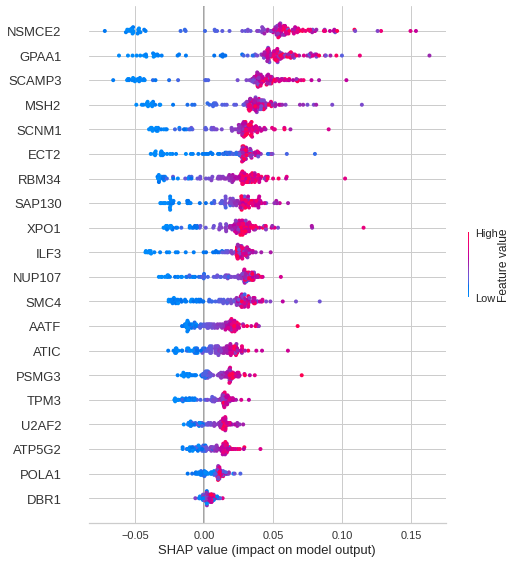

In [20]:
interpret_model(best, plot = 'summary', use_train_data=False)

In [22]:
interpret_model(best, plot = 'reason', use_train_data=False)

In [203]:
X_train = get_config('X_train')

In [204]:
X_train

,WeekofPurchase,PriceCH,PriceMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,StoreID_1,StoreID_2,StoreID_3,SpecialCH_1,SpecialMM_0,STORE_0,STORE_4
150,252.0,1.86,2.09,0.163840,2.09,1.76,0.33,0.000000,0.053763,0.23,0.0,0.0,0.0,0.0,1.0,1.0,0.0
861,234.0,1.75,1.99,0.500000,1.59,1.75,-0.16,0.201005,0.000000,0.24,0.0,0.0,0.0,1.0,1.0,1.0,0.0
605,265.0,1.86,2.13,0.985363,2.13,1.49,0.64,0.000000,0.198925,0.27,0.0,0.0,0.0,1.0,1.0,1.0,0.0
31,265.0,1.86,2.13,0.600000,2.13,1.49,0.64,0.000000,0.198925,0.27,0.0,0.0,0.0,1.0,1.0,1.0,0.0
404,275.0,1.99,2.13,0.140729,1.59,1.99,-0.40,0.253521,0.000000,0.14,0.0,0.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,247.0,1.99,2.23,0.909593,2.23,1.99,0.24,0.000000,0.000000,0.24,0.0,0.0,0.0,0.0,1.0,0.0,1.0
747,234.0,1.79,2.09,0.256000,2.09,1.79,0.30,0.000000,0.000000,0.30,0.0,0.0,1.0,0.0,1.0,0.0,0.0
586,272.0,1.86,2.13,0.895142,2.13,1.86,0.27,0.000000,0.000000,0.27,0.0,0.0,0.0,0.0,1.0,1.0,0.0
853,237.0,1.75,1.99,0.895142,1.99,1.75,0.24,0.000000,0.000000,0.24,1.0,0.0,0.0,0.0,1.0,0.0,0.0
